## Solving Bansal Yaron by Interpolation Methods

In [1]:
include("src/bansal_yaron_parameters.jl")
include("src/bansal_yaron_interpolation.jl")

T_interp (generic function with 2 methods)

In [2]:
using PyPlot
plt = PyPlot

PyPlot

In [3]:
ez = EpsteinZinBY()
sv = StochasticVolatilityBY()

StochasticVolatility{Float64}(0.979, 0.044, 0.987, 7.909200000000006e-7, 2.3e-6)

In [4]:
ez.θ

-26.999999999999996

In [5]:
σ_min, σ_max, σ_gridsize = 1e-6, 0.015, 12
z_min, z_max, z_gridsize = -0.015, 0.015, 12
σ_grid = linspace(σ_min, σ_max, σ_gridsize)
z_grid = linspace(z_min, z_max, z_gridsize)

-0.015:0.0027272727272727275:0.015

In [6]:
shock_size = 50
η_vec = randn(shock_size)
ω_vec = randn(shock_size)

w_in = ones(z_gridsize, σ_gridsize) * 100
w_out = similar(w_in)

tol = 1e-4
error = tol + 1
max_iter = 8000
iter = 0

while error > tol && iter < max_iter
    T_interp(ez, sv, w_in, w_out, z_grid, σ_grid, η_vec, ω_vec)
    error = maximum(abs, w_in - w_out)
    copy!(w_in, w_out)
    iter += 1
end

In [7]:
iter

2368

In [8]:
error

9.991750466931126e-5

In [9]:
w = w_out
w = w.^(1 / (1 - 1 / ez.ψ))

12×12 Array{Float64,2}:
 0.172233  0.171498  0.169176  0.165515  …  0.125624  0.117483  0.109333
 0.192527  0.191705  0.189114  0.185033     0.140736  0.131697  0.12265 
 0.215286  0.214368  0.211473  0.206919     0.15747   0.147403  0.137333
 0.240839  0.239812  0.236581  0.231497     0.176146  0.1649    0.15366 
 0.269553  0.268406  0.264805  0.25912      0.197049  0.184459  0.171887
 0.30185   0.300578  0.296557  0.290183  …  0.220481  0.206366  0.192282
 0.338237  0.336814  0.332293  0.325123     0.246768  0.230924  0.215128
 0.379209  0.377595  0.372493  0.364413     0.276264  0.258468  0.240736
 0.425302  0.423476  0.417709  0.408597     0.309372  0.28937   0.269452
 0.477156  0.475093  0.468575  0.458287     0.346544  0.324051  0.301662
 0.535496  0.533165  0.525798  0.514176  …  0.388265  0.362959  0.337784
 0.601115  0.59848   0.590145  0.576991     0.434913  0.406434  0.378122

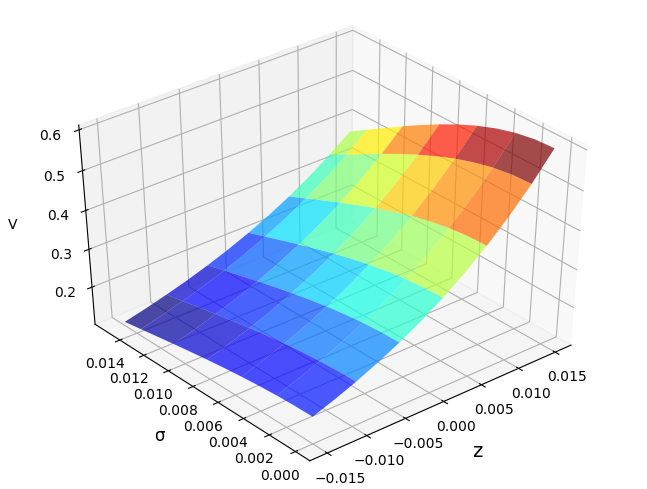

In [10]:
using QuantEcon: meshgrid

fig = figure(figsize=(8,6))
ax = fig[:gca](projection="3d")
ax[:view_init](40, 230)


xgrid, ygrid = meshgrid(z_grid, σ_grid)

ax[:plot_surface](xgrid, 
                ygrid, 
                w', 
                rstride=2, cstride=2,
                cmap=ColorMap("jet"), 
                alpha=0.7, 
                linewidth=0.25)

#ax[:set_zlim](-0.5, 1.0)
ax[:set_zlabel]("V", labelpad=10)
ax[:set_xlabel]("z", labelpad=10, fontsize=14)
ax[:set_ylabel]("σ", labelpad=10, fontsize=12)

plt.show()